
# Project: Investigate a Dataset - Gapminder World



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
> In this project I will analyze Income per person between 1980 and 2015 and GDP contribution (%) of agriculture, industry, service sectors and life expectancy in 2015 of the world.

### Question(s) for Analysis
>1. Which region has the highest income per person? 

>2. Which country has change the most in terms of income?

>3. What are the characteristics of high income countries?

>4. Do countries with higher income live longer?

>5. Do countries with higher income rely more on service?

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
#Get gdp data in 1980 and 2015 of the world
df_gdp = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_gdp=df_gdp[['country','1980', '2015']]
df_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  195 non-null    object
 1   1980     195 non-null    object
 2   2015     195 non-null    object
dtypes: object(3)
memory usage: 4.7+ KB


In [3]:
# Get income groups and regions of countries
df = pd.read_csv('ddf--entities--geo--country.csv')
df=df[['income_3groups', 'name', 'world_4region']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   income_3groups  218 non-null    object
 1   name            273 non-null    object
 2   world_4region   271 non-null    object
dtypes: object(3)
memory usage: 6.5+ KB


In [4]:
#Get life expectancy data in 2015 of the world
df_life = pd.read_csv('life_expectancy_years.csv')
df_life = df_life[['country', '2015']]
df_life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  195 non-null    object 
 1   2015     195 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [5]:
df_service = pd.read_csv('services_percent_of_gdp.csv')
df_service = df_service[['country', '2015']]
df_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  197 non-null    object 
 1   2015     193 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [6]:
df_industry = pd.read_csv('industry_percent_of_gdp.csv')
df_industry = df_industry[['country', '2015']]
df_industry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  204 non-null    object 
 1   2015     196 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


In [7]:
df_agri = pd.read_csv('agriculture_percent_of_gdp.csv')
df_agri = df_agri[['country', '2015']]
df_agri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  205 non-null    object 
 1   2015     194 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB



### Data Cleaning
 

In [8]:
# Rename columns and change datatype of columns in df_gdp
df_gdp.rename(columns = {'1980': 'gdp_1980', '2015': 'gdp_2015'}, inplace = True)
df_gdp.astype({'gdp_1980': 'string', 'gdp_2015': 'string'}).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   country   195 non-null    object
 1   gdp_1980  195 non-null    string
 2   gdp_2015  195 non-null    string
dtypes: object(1), string(2)
memory usage: 4.7+ KB


In [9]:
# Change datatype of GDP to float to perform calculation later
def convert(value):
    if value:
        # determine multiplier
        multiplier = 1
        if value.endswith("k"):
            multiplier = 1000
            value = value[0:len(value)-1] # strip multiplier character
        elif value.endswith("m"):
            multiplier = 1000000
            value = value[0:len(value)-1] # strip multiplier character
        # convert value to float, multiply, then convert the result to int
        return float(value) * multiplier
df_gdp["gdp_1980"] = df_gdp["gdp_1980"].apply(convert)
df_gdp["gdp_2015"] = df_gdp["gdp_2015"].apply(convert)
df_gdp.head(10)


,country,gdp_1980,gdp_2015
0,Afghanistan,1170.0,2070.0
1,Angola,1760.0,8040.0
2,Albania,4470.0,11900.0
3,Andorra,35800.0,52100.0
4,United Arab Emirates,93500.0,65200.0
5,Argentina,17000.0,23900.0
6,Armenia,6880.0,11300.0
7,Antigua and Barbuda,7910.0,18600.0
8,Australia,26200.0,47800.0
9,Austria,28800.0,53000.0


In [10]:
#Calculate GDP change
df_gdp["gdp_change"] = df_gdp["gdp_2015"] - df_gdp["gdp_1980"]
df_gdp.head(10)

,country,gdp_1980,gdp_2015,gdp_change
0,Afghanistan,1170.0,2070.0,900.0
1,Angola,1760.0,8040.0,6280.0
2,Albania,4470.0,11900.0,7430.0
3,Andorra,35800.0,52100.0,16300.0
4,United Arab Emirates,93500.0,65200.0,-28300.0
5,Argentina,17000.0,23900.0,6900.0
6,Armenia,6880.0,11300.0,4420.0
7,Antigua and Barbuda,7910.0,18600.0,10690.0
8,Australia,26200.0,47800.0,21600.0
9,Austria,28800.0,53000.0,24200.0


In [11]:
#Rename and change datatype of df
df.rename(columns = {'name': 'country'}, inplace = True)
df = df.astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   income_3groups  218 non-null    string
 1   country         273 non-null    string
 2   world_4region   271 non-null    string
dtypes: string(3)
memory usage: 6.5 KB


In [12]:
#Rename and change datatype of df_life
df_life['country'] = df_life['country'].astype('string')
df_life.rename(columns = {'2015': 'life_expectancy_2015'}, inplace = True)
df_life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               195 non-null    string 
 1   life_expectancy_2015  195 non-null    float64
dtypes: float64(1), string(1)
memory usage: 3.2 KB


In [13]:
#Rename and change datatype of df_service
df_service.rename(columns = {'2015': 'service_2015'}, inplace = True)
df_service['country'] = df_service['country'].astype('string')
df_service.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       197 non-null    string 
 1   service_2015  193 non-null    float64
dtypes: float64(1), string(1)
memory usage: 3.2 KB


In [14]:
#Rename and change datatype of df_industry
df_industry['country'] = df_industry['country'].astype('string')
df_industry.rename(columns = {'2015': 'industry_2015'}, inplace = True)
df_industry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        204 non-null    string 
 1   industry_2015  196 non-null    float64
dtypes: float64(1), string(1)
memory usage: 3.3 KB


In [15]:
#Rename and change datatype of df_agri
df_agri['country'] = df_agri['country'].astype('string')
df_agri.rename(columns = {'2015': 'agriculture_2015'}, inplace = True)
df_agri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           205 non-null    string 
 1   agriculture_2015  194 non-null    float64
dtypes: float64(1), string(1)
memory usage: 3.3 KB


In [16]:
#Combine dfs to get 1 consolidated df 
df_combined = df.merge(df_life, on = 'country').merge(df_service, on = 'country')
df_combined_1 = df_combined.merge(df_agri, on = 'country').merge(df_industry, on = 'country')
dfs = df_combined_1.merge(df_gdp, on = 'country')
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 0 to 182
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   income_3groups        183 non-null    string 
 1   country               183 non-null    object 
 2   world_4region         183 non-null    string 
 3   life_expectancy_2015  183 non-null    float64
 4   service_2015          181 non-null    float64
 5   agriculture_2015      181 non-null    float64
 6   industry_2015         181 non-null    float64
 7   gdp_1980              183 non-null    float64
 8   gdp_2015              183 non-null    float64
 9   gdp_change            183 non-null    float64
dtypes: float64(7), object(1), string(2)
memory usage: 15.7+ KB


In [17]:
#Drop nulll value
dfs.dropna(inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis

### Q1: Which region has the highest income per person in 2015? 

In [18]:
dfs.groupby('world_4region').mean()

,life_expectancy_2015,service_2015,agriculture_2015,industry_2015,gdp_1980,gdp_2015,gdp_change
world_4region,,,,,,,
africa,63.819608,49.464706,19.335098,23.822745,3267.176471,5652.509804,2385.333333
americas,74.796970,60.503030,7.124667,23.390909,9926.363636,17457.575758,7531.212121
asia,72.592453,55.677358,10.437860,28.850377,15832.283019,20753.207547,4920.924528
europe,78.345455,60.377273,4.312273,23.661364,19029.772727,34884.090909,15854.318182


### Q2: Which country has change the most in terms of income?

In [19]:
dfs['gdp_change'].idxmax()

101

In [20]:
dfs[101:102]

,income_3groups,country,world_4region,life_expectancy_2015,service_2015,agriculture_2015,industry_2015,gdp_1980,gdp_2015,gdp_change
102,high_income,Latvia,europe,75.1,65.3,3.5,19.1,15400.0,26700.0,11300.0


### Q3: What are the characteristics of high income countries?

In [21]:
df_high_income = dfs.query('income_3groups == "high_income"')
df_high_income.describe()

,life_expectancy_2015,service_2015,agriculture_2015,industry_2015,gdp_1980,gdp_2015,gdp_change
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,79.194444,64.024074,1.902974,26.037593,27607.777778,44040.740741,16432.962963
std,3.921947,9.060029,1.316142,12.265805,24017.944680,18875.186052,19771.747962
min,67.200000,39.400000,0.032600,6.970000,6030.000000,18400.000000,-64900.000000
25%,76.200000,57.525000,0.931750,19.200000,15425.000000,29450.000000,12050.000000
50%,80.950000,65.400000,1.795000,23.750000,21900.000000,40150.000000,17550.000000
75%,82.300000,69.975000,2.620000,30.025000,29475.000000,52625.000000,22125.000000
max,84.300000,89.800000,6.130000,61.400000,128000.000000,111000.000000,70700.000000


array([[<AxesSubplot:title={'center':'life_expectancy_2015'}>,
        <AxesSubplot:title={'center':'service_2015'}>,
        <AxesSubplot:title={'center':'agriculture_2015'}>],
       [<AxesSubplot:title={'center':'industry_2015'}>,
        <AxesSubplot:title={'center':'gdp_1980'}>,
        <AxesSubplot:title={'center':'gdp_2015'}>],
       [<AxesSubplot:title={'center':'gdp_change'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

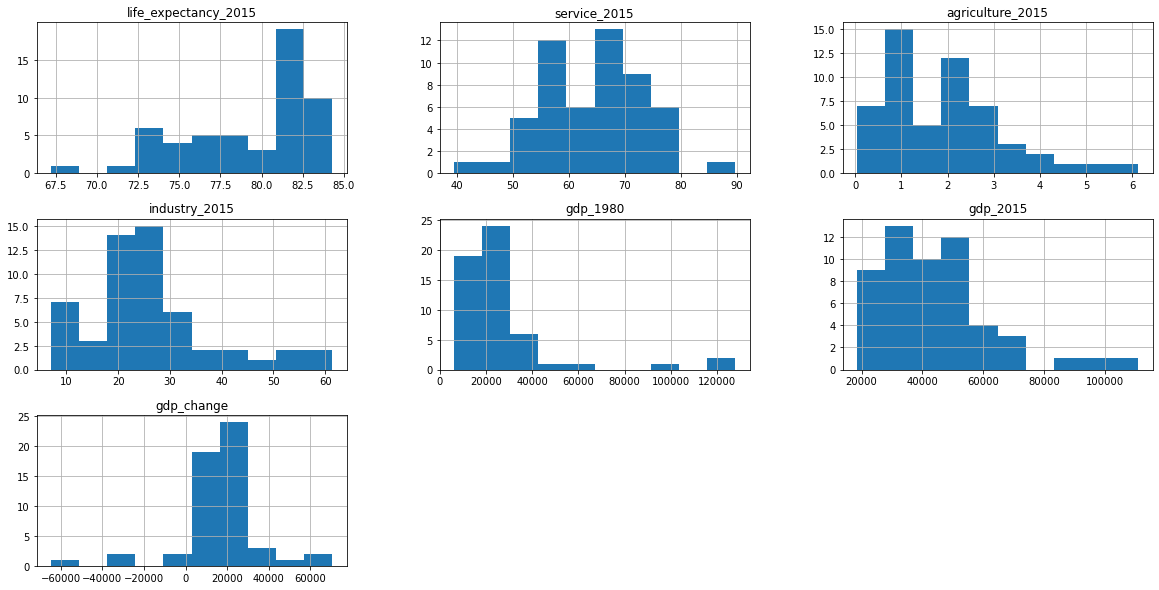

In [22]:
df_high_income.hist(figsize = (20,10) )

In [23]:
dfs.describe()

,life_expectancy_2015,service_2015,agriculture_2015,industry_2015,gdp_1980,gdp_2015,gdp_change
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,71.920994,55.949171,10.851661,25.176961,11992.359116,19332.585635,7340.226519
std,7.582231,11.584571,10.691784,10.677607,17172.332979,19906.008256,13157.388251
min,48.500000,23.400000,0.032600,4.560000,551.000000,825.000000,-64900.000000
25%,66.400000,48.600000,2.620000,18.100000,2510.000000,4280.000000,1040.000000
50%,73.200000,55.900000,7.100000,24.300000,5900.000000,11900.000000,4600.000000
75%,77.400000,62.300000,16.900000,30.200000,14100.000000,27900.000000,12600.000000
max,84.300000,94.000000,58.700000,61.400000,128000.000000,111000.000000,70700.000000


array([[<AxesSubplot:title={'center':'life_expectancy_2015'}>,
        <AxesSubplot:title={'center':'service_2015'}>,
        <AxesSubplot:title={'center':'agriculture_2015'}>],
       [<AxesSubplot:title={'center':'industry_2015'}>,
        <AxesSubplot:title={'center':'gdp_1980'}>,
        <AxesSubplot:title={'center':'gdp_2015'}>],
       [<AxesSubplot:title={'center':'gdp_change'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

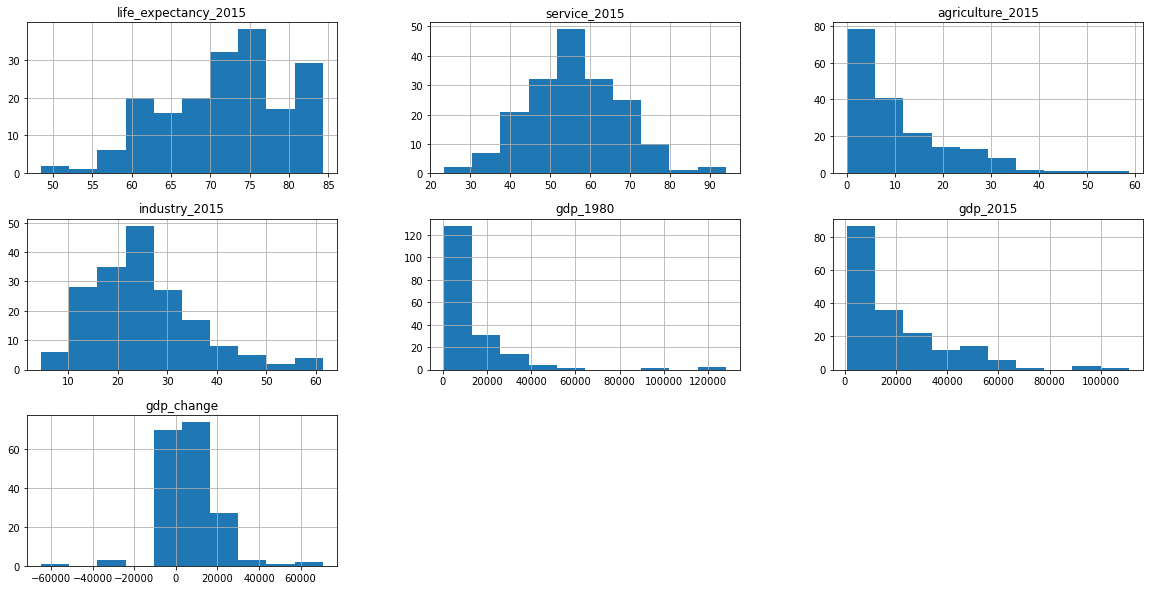

In [24]:
dfs.hist(figsize = (20,10))

### Q4: Do countries with higher income live longer?

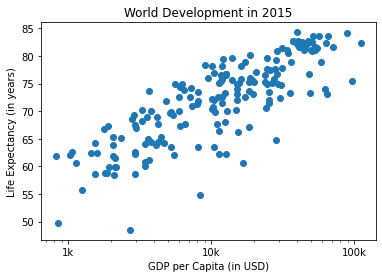

In [25]:
plt.scatter(dfs['gdp_2015'], dfs['life_expectancy_2015'])
plt.xscale('log')
xlab = 'GDP per Capita (in USD)'
ylab = 'Life Expectancy (in years)'
title = 'World Development in 2015'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
tick_val = [1000, 10000, 100000]
tick_lab = ['1k', '10k', '100k']
plt.xticks(tick_val,tick_lab)
plt.show()

### Q5: Do countries with higher income rely more on service?

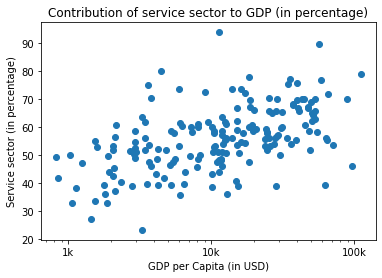

In [26]:
plt.scatter(dfs['gdp_2015'], dfs['service_2015'])
plt.xscale('log')
xlab = 'GDP per Capita (in USD)'
ylab = 'Service sector (in percentage)'
title = 'Contribution of service sector to GDP (in percentage)'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
tick_val = [1000, 10000, 100000]
tick_lab = ['1k', '10k', '100k']
plt.xticks(tick_val,tick_lab)
plt.show()

<a id='conclusions'></a>
## Conclusions

> According to analysis results, we can see that Europe has highest income per capita among 4 world regions, about 34884 dollars in 2015, which is six-time higher than that of Africa(5652 dollars). Europe also has the highest income per capita country in the world: Luxembourg, whose income per person is 111000 dollars in 2015.

> We can also see some characteristics of high income countries. Their average age is 79, higher than the world average, 71. Their GDP rely heavily on service, which contributes to 64 percent of GDP on average. On the other hands, agriculture only takes 1 percent in GDP. 

> There is also positive correlation between GDP per capita and life expectancy. And the more income per person, the more contribution of service to GDP. 

> The analysis has some limitations on data access. One of the limitation is that there are some countries having no data of analysis attributes. Therefore, they are removed from the analysis, which makes the calculation for the world not entirely accurate.